数据预处理

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据集
data_df = pd.read_csv("archive/creditcard.csv")
print(data_df.shape)
data_df['Hour'] = data_df['Time'].apply(lambda x:divmod(x,3600)[0])
data_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [4]:
# 删除影响较小的特征同时删除Time保留Hour字段
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_df_new = data_df.drop(droplist, axis = 1)
print(data_df_new.shape) #特征从31个缩减至18个（不含目标变量）
data_df_new.tail()

(284807, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.77,0,47.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,24.79,0,47.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,67.88,0,47.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,10.00,0,47.0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,0.486180,-0.915427,-1.040458,-0.031513,-0.084316,-0.302620,-0.660377,0.167430,-0.256117,217.00,0,47.0


利用随机森林的feature importance对特征的重要性进行排序

In [5]:
x_feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount',  'Hour']
x_val = data_df_new[x_feature]
y_val = data_df_new['Class']

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123,max_depth=4)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合


RandomForestClassifier(max_depth=4, n_estimators=10, random_state=123)

('V1', np.float64(0.0008826091438778425))
('V2', np.float64(0.0021058185061093608))
('V3', np.float64(0.009750867340434583))
('V4', np.float64(0.01751094043420745))
('V5', np.float64(0.008600547467227002))
('V6', np.float64(0.013298075656335426))
('V7', np.float64(0.0086835897086001))
('V9', np.float64(0.023090145788325165))
('V10', np.float64(0.08528888657921369))
('V11', np.float64(0.06537921978883558))
('V12', np.float64(0.14194613523236163))
('V14', np.float64(0.13109127164220205))
('V16', np.float64(0.19729822871872432))
('V17', np.float64(0.27966491161168533))
('V18', np.float64(0.009405287105749225))
('V19', np.float64(0.0002669771829968763))
('Amount', np.float64(0.0017493348363684953))
('Hour', np.float64(0.003987153256745854))


(-1.0, 18.0)

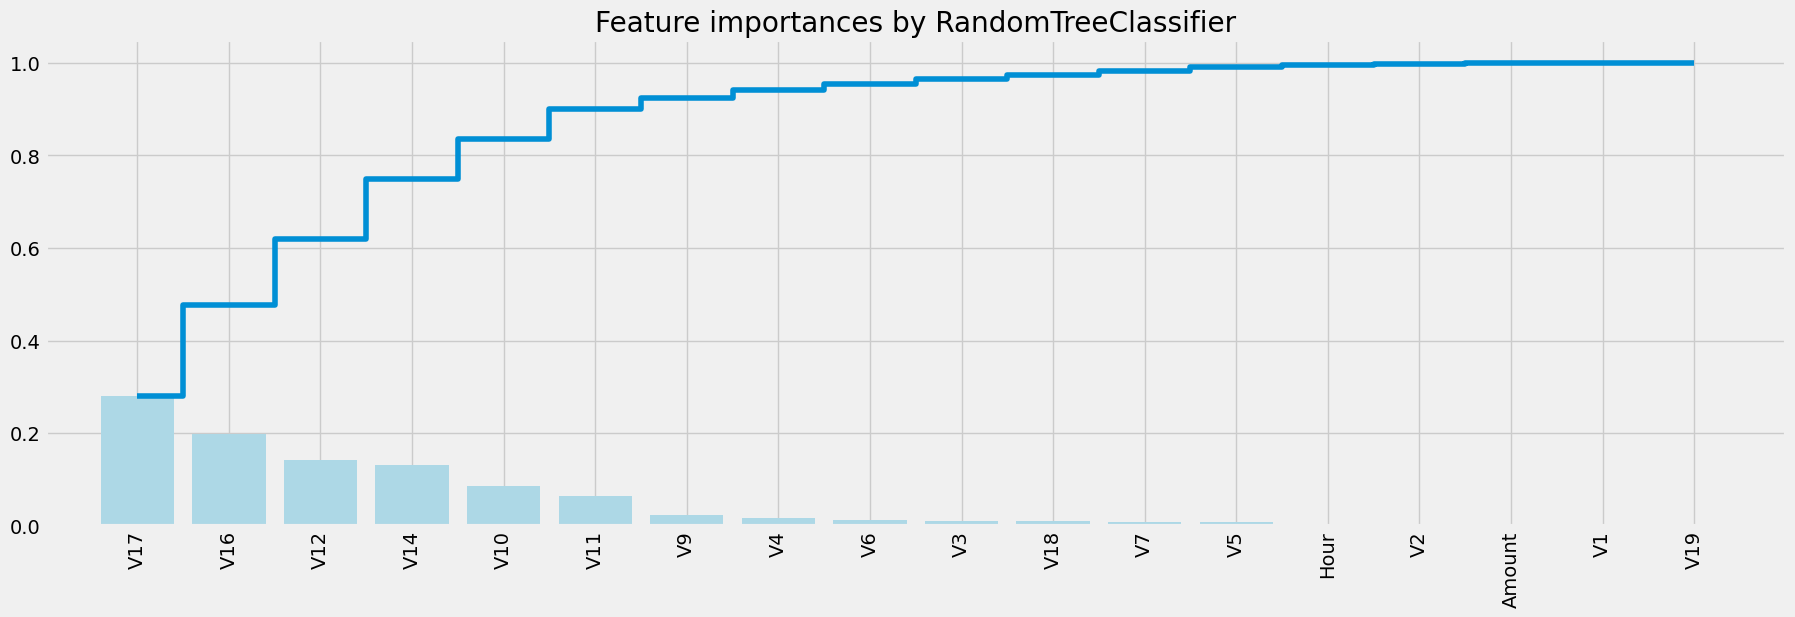

In [6]:
import numpy as np

for feature in zip(x_feature,clf.feature_importances_):
    print(feature)

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = data_df_new[x_feature].columns
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")

x = list(range(len(indices)))

plt.bar(x, importances[indices], color='lightblue',  align="center")
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])


In [7]:
# Lets shuffle the data before creating the subsamples
df = data_df_new.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()


(984, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
264033,1.953086,-0.116370,-1.215067,1.287632,0.210849,-0.127293,-0.020247,0.541020,0.369349,0.336638,0.570689,0.500695,-0.334068,-0.379779,0.339979,0.072531,13.00,0,44.0
53794,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,-1.895516,-3.364011,2.887048,-3.784460,-3.985626,-2.603703,-5.157596,-0.696010,1.285961,1.00,1,12.0
71828,-2.884332,0.241184,1.818326,0.315422,-1.202576,2.674072,-0.089243,1.506324,-0.326040,-0.946206,0.943425,-1.403583,0.159560,-0.444152,0.538095,0.003349,175.00,0,15.0
120505,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,-3.097379,-6.447202,3.775578,-7.498783,-8.658268,-6.173331,-10.708018,-3.504894,1.884044,99.85,1,21.0
14197,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,-4.099551,-9.222826,6.329365,-8.952191,-9.825054,-7.541687,-14.259599,-5.035052,1.432268,99.99,1,7.0


In [8]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 2.7 s
PCA took 0.006 s
Truncated SVD took 0.002 s


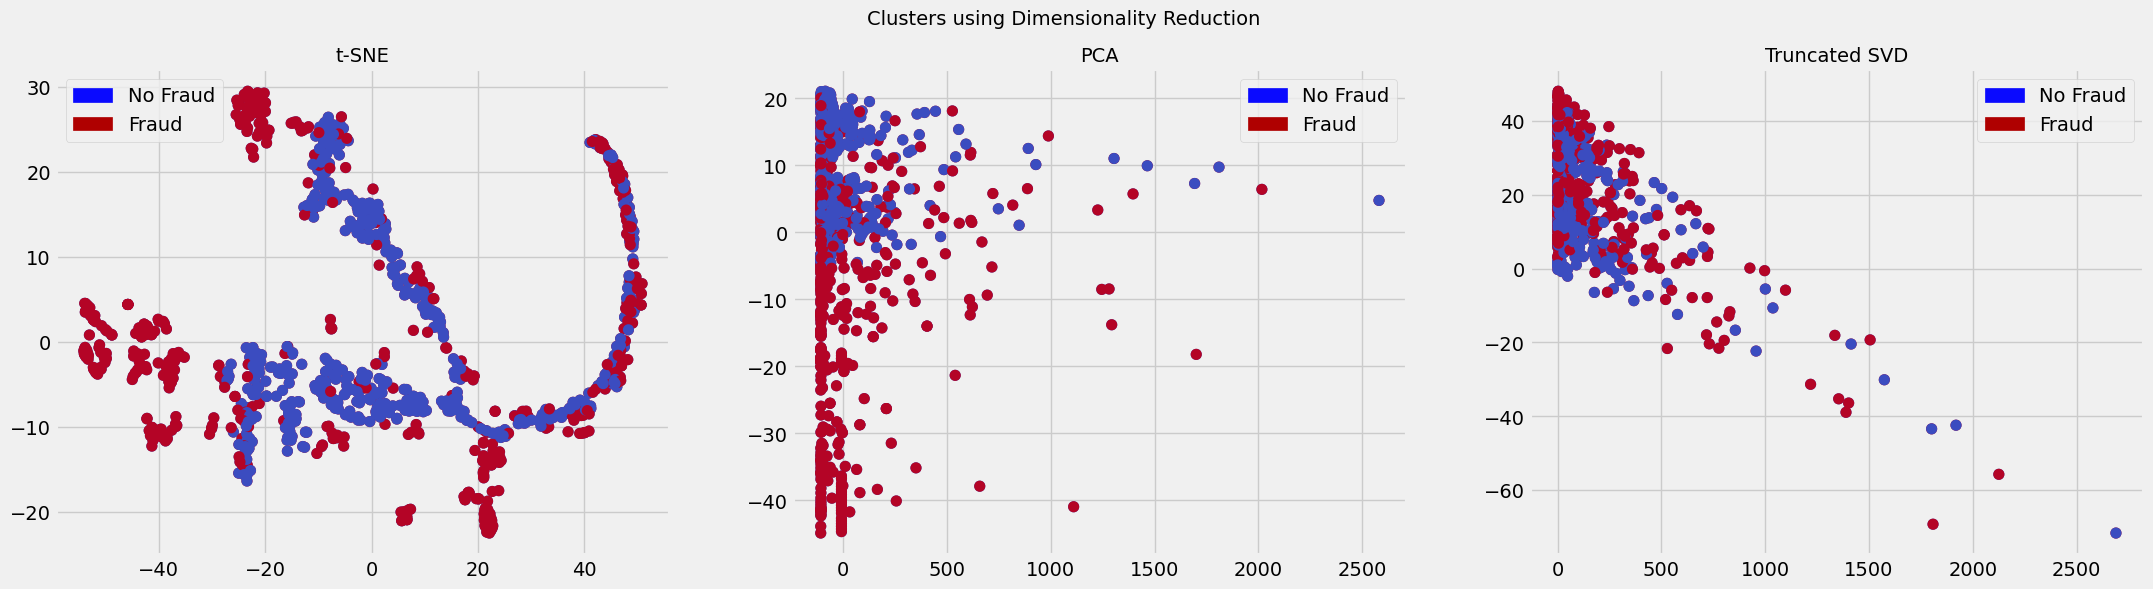

In [9]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


In [10]:
# 构建自变量和因变量
#最终选取的特征
x_feature = x_feature = ['V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
X = data_df[x_feature]
y = data_df["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])


样本个数：284807; 正样本占0.17%; 负样本占99.83%
特征维数： 13


SMOTE过采样解决样本不平衡问题

In [11]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])


通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%
特征维数： 13


训练模型

Logistic回归

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size= 0.3,random_state=42)

# 模型训练
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 构建逻辑回归分类器
lr.fit(X_train, y_train)

# 测试集预测
y_pred = lr.predict(X_test)

# 模型评估
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Confusion Matrix:
 [[83161  2134]
 [ 8563 76731]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     85295
           1       0.97      0.90      0.93     85294

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



XGBoost

In [14]:
import xgboost as xgb

xgb = xgb.XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,xgb_yhat))
print('Classification Report:\n',classification_report(y_test,xgb_yhat))

Confusion Matrix:
 [[84702   593]
 [  355 84939]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.99      1.00      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



KS值对比

In [15]:
from sklearn.metrics import roc_curve
import numpy as np

# 合并结果方便对比
results = pd.DataFrame({
    'true_label': y_test,
    'prob_lr': y_pred,
    'prob_xgb': xgb_yhat
})

def calculate_ks(y_true, y_prob):
    # 按概率排序
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    df = df.sort_values('y_prob', ascending=False).reset_index(drop=True)
    
    # 计算累积分布
    df['cum_bad'] = (1 - df['y_true']).cumsum() / (1 - df['y_true']).sum()  # 负样本累积
    df['cum_good'] = df['y_true'].cumsum() / df['y_true'].sum()  # 正样本累积
    df['ks'] = np.abs(df['cum_good'] - df['cum_bad'])
    
    # 返回最大KS值和最佳阈值
    max_ks = df['ks'].max()
    best_thresh = df.loc[df['ks'].idxmax(), 'y_prob']
    return max_ks, best_thresh

# 计算两个模型的KS
ks_lr, thresh_lr = calculate_ks(results['true_label'], results['prob_lr'])
ks_xgb, thresh_xgb = calculate_ks(results['true_label'], results['prob_xgb'])

print(f"Logistic回归 KS值: {ks_lr:.3f} (最佳阈值={thresh_lr:.3f})")
print(f"XGBoost KS值: {ks_xgb:.3f} (最佳阈值={thresh_xgb:.3f})")

Logistic回归 KS值: 0.875 (最佳阈值=1.000)
XGBoost KS值: 0.989 (最佳阈值=1.000)


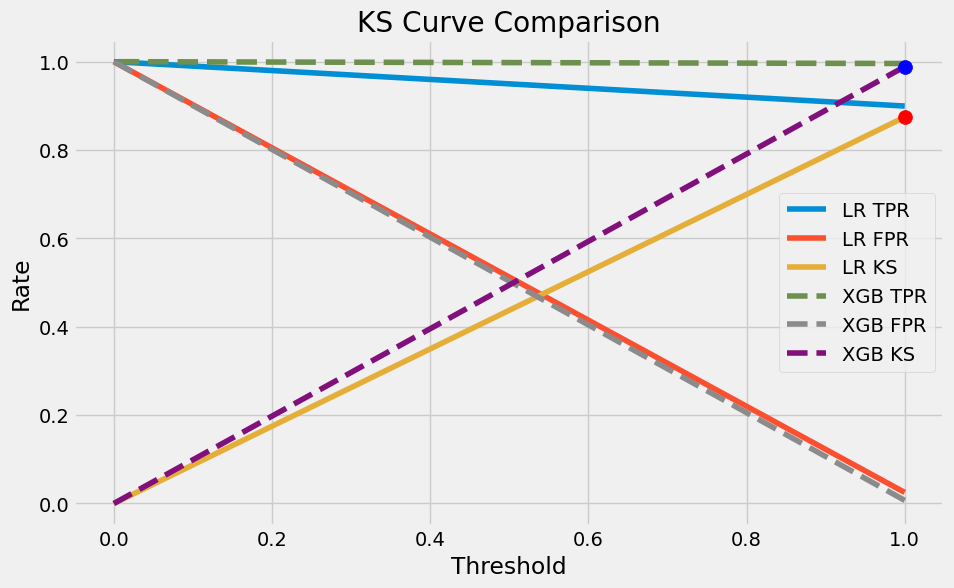

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

# 绘制逻辑回归KS曲线
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred)
plt.plot(thresholds_lr, tpr_lr, label='LR TPR')
plt.plot(thresholds_lr, fpr_lr, label='LR FPR')
plt.plot(thresholds_lr, tpr_lr - fpr_lr, label='LR KS')

# 绘制XGBoost KS曲线
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_yhat)
plt.plot(thresholds_xgb, tpr_xgb, '--', label='XGB TPR')
plt.plot(thresholds_xgb, fpr_xgb, '--', label='XGB FPR')
plt.plot(thresholds_xgb, tpr_xgb - fpr_xgb, '--', label='XGB KS')

# 标注最大KS点
plt.scatter(thresh_lr, ks_lr, s=100, c='red', zorder=5)
plt.scatter(thresh_xgb, ks_xgb, s=100, c='blue', zorder=5)
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('KS Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()